In [1]:
catFeature = 'verification_status'
contTarget = 'loan_amnt'

In [2]:
pwd

'/Users/grizzlym1/Library/Mobile Documents/com~apple~CloudDocs/Download_ALL_Apple/github/2024-NT-Python-and-PowerBI/dev'

In [3]:
! ls -l ../data/

total 2265936
-rw-r--r--  1 grizzlym1  staff  1160157683 Mar 23  2023 LoanStats_web.csv


In [4]:
! head -10 ../data/*.csv

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [5]:
### https://chat.openai.com/share/d835f292-f1f2-4eeb-85c5-6e437210298e

import pandas as pd

# Assuming `data.csv` is your file name
df = pd.read_csv('../data/LoanStats_web.csv', dtype=str)

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns where more than 30% of the data is missing
columns_to_keep = missing_percentage[missing_percentage <= 30].index.tolist()
filtered_df = df[columns_to_keep]

print(filtered_df.head())  # To display the first few rows of the filtered DataFrame
### filtered_df.to_csv('filtered_loanstats_web.csv', index=False)  # To save the filtered DataFrame to a new CSV file

  loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0     12800       12800           12800   36 months   11.99%      425.09   
1      9000        9000            9000   36 months   15.31%      313.36   
2      8000        8000            8000   36 months   10.75%      260.97   
3     25000       25000           25000   60 months   12.99%       568.7   
4     35000       35000           35000   60 months   18.25%      893.54   

  grade sub_grade              emp_title emp_length  ... pct_tl_nvr_dlq  \
0     C        C1  LOGISTICS COORDINATOR    6 years  ...            100   
1     C        C5  Senior Case Assistant    9 years  ...           92.3   
2     B        B4                     Vp    5 years  ...            100   
3     C        C2         Administration  10+ years  ...            100   
4     D        D3           Electrician   10+ years  ...            100   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              100     

In [7]:
df = filtered_df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432466 entries, 0 to 1432465
Data columns (total 100 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   loan_amnt                   1432440 non-null  object
 1   funded_amnt                 1432440 non-null  object
 2   funded_amnt_inv             1432440 non-null  object
 3   term                        1432440 non-null  object
 4   int_rate                    1432440 non-null  object
 5   installment                 1432440 non-null  object
 6   grade                       1432440 non-null  object
 7   sub_grade                   1432440 non-null  object
 8   emp_title                   1302202 non-null  object
 9   emp_length                  1323970 non-null  object
 10  home_ownership              1432440 non-null  object
 11  annual_inc                  1432440 non-null  object
 12  verification_status         1432440 non-null  object
 13  issue_d    

### คำถาม: ในข้อมูลนี้เป็นลูกค้าที่ได้รับเงินกู้ทั้งหมด อยากทราบว่า ... มีความสัมพันธ์กับ ... หรือไม่

### จัดเตรียมข้อมูลแบบ Series เพื่อการทดสอบความสัมพันธ์

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# สมมติว่า df_clean เป็น DataFrame ที่คุณมีอยู่และ 'catFeature' เป็นคอลัมน์ที่มีค่า categorical หลาย ค่า
# สร้างสำเนาเพื่อหลีกเลี่ยง SettingWithCopyWarning
df_clean = df.copy()

# แปลงข้อมูลใน contTarget ให้เป็นตัวเลข
df_clean[contTarget] = pd.to_numeric(df_clean[contTarget], errors='coerce')

# ตรวจสอบและลบค่า NaN หลังจากการแปลง
df_clean = df_clean.dropna(subset=[contTarget])

# หลังจากแปลงข้อมูลแล้ว สร้าง groups ซึ่งประกอบด้วย series ของ loan_amnt หลายๆ ชุด ที่ถูกสร้างขึ้นจาก value แต่ละแบบของ catFeature
groups = [df_clean[df_clean[catFeature] == value][contTarget] for value in df_clean[catFeature].unique()]

# ลบ Series ที่ว่างเปล่า (ถ้ามี)
groups = [group for group in groups if not group.empty]

In [10]:
### df_clean[df_clean[catFeature] == 'RENT'][contTarget]

### Kolmogorov-Smirnov Test และ Anderson-Darling Test เพื่อดูว่ามีการแจกแจงแบบปกติ หรือไม่

In [11]:
from scipy import stats

# สมมติว่า 'groups' เป็น list ที่มีข้อมูลของแต่ละกลุ่มที่คุณต้องการทดสอบ
results = []

for i, group in enumerate(groups):
    # ทำการทดสอบ Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(group, 'norm')
    
    # ทำการทดสอบ Anderson-Darling
    ad_test = stats.anderson(group, dist='norm')
    
    # บันทึกผลลัพธ์
    results.append({
        'Group': i,
        'KS_stat': ks_stat,
        'KS_p': ks_p,
        'AD_stat': ad_test.statistic,
        'AD_critical_values': ad_test.critical_values,
        'AD_significance_levels': ad_test.significance_level
    })

# พิมพ์ผลลัพธ์
for result in results:
    print(f"Group {result['Group']}:")
    print(f"  Kolmogorov-Smirnov Test: stat={result['KS_stat']:.3f}, p={result['KS_p']:.3f}")
    print(f"  Anderson-Darling Test: statistic={result['AD_stat']:.3f}")
    for sl, cv in zip(result['AD_significance_levels'], result['AD_critical_values']):
        print(f"  Critical Value (at {sl}%): {cv:.3f},", 'Data looks normal' if result['AD_stat'] < cv else 'Data does not look normal')
    print("\n")


Group 0:
  Kolmogorov-Smirnov Test: stat=1.000, p=0.000
  Anderson-Darling Test: statistic=6550.261
  Critical Value (at 15.0%): 0.576, Data does not look normal
  Critical Value (at 10.0%): 0.656, Data does not look normal
  Critical Value (at 5.0%): 0.787, Data does not look normal
  Critical Value (at 2.5%): 0.918, Data does not look normal
  Critical Value (at 1.0%): 1.092, Data does not look normal


Group 1:
  Kolmogorov-Smirnov Test: stat=1.000, p=0.000
  Anderson-Darling Test: statistic=14353.579
  Critical Value (at 15.0%): 0.576, Data does not look normal
  Critical Value (at 10.0%): 0.656, Data does not look normal
  Critical Value (at 5.0%): 0.787, Data does not look normal
  Critical Value (at 2.5%): 0.918, Data does not look normal
  Critical Value (at 1.0%): 1.092, Data does not look normal


Group 2:
  Kolmogorov-Smirnov Test: stat=1.000, p=0.000
  Anderson-Darling Test: statistic=7293.618
  Critical Value (at 15.0%): 0.576, Data does not look normal
  Critical Value (a

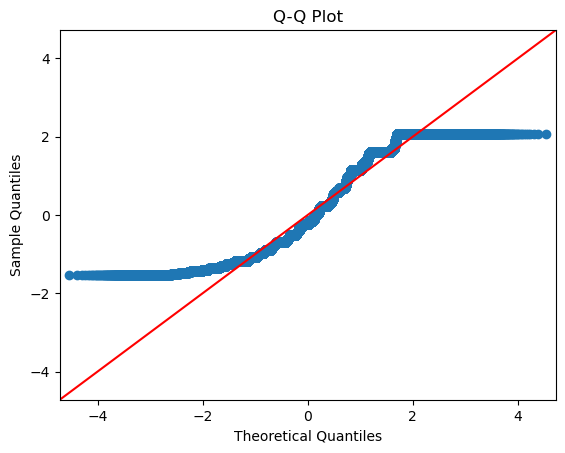

In [12]:
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

# สมมติว่า 'data' เป็นชุดข้อมูลที่คุณต้องการตรวจสอบ
# ตัวอย่าง: data = df_clean[df_clean['catFeature'] == 'Group1'][contTarget]

# เลือกข้อมูลจากหนึ่งในกลุ่มของคุณ
data = groups[0]  # เปลี่ยน 0 เป็น index ของกลุ่มที่คุณต้องการตรวจสอบ

# สร้าง Q-Q plot
sm.qqplot(data, line ='45', fit=True) 
plt.title('Q-Q Plot')
plt.show()


### Mann-Whitney U test

In [13]:
# ทำ Kruskal-Wallis H-test
stat, p = kruskal(*groups)
print(f'Kruskal-Wallis H-test stat={stat:.3f}, p={p:.3e}')

# การแปรผล
alpha = 0.05  # ระดับนัยสำคัญ
if p < alpha:
    print("มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (reject H0)")
    # ทำ Post-hoc test ถ้าจำเป็น
    # ...
else:
    print("ไม่มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (fail to reject H0)")

Kruskal-Wallis H-test stat=20134.328, p=0.000e+00
มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (reject H0)


### Plot กราฟ เพื่อเปรียบเทียบ ความหมายของกราฟ กับ ความหมายทางสถิติ

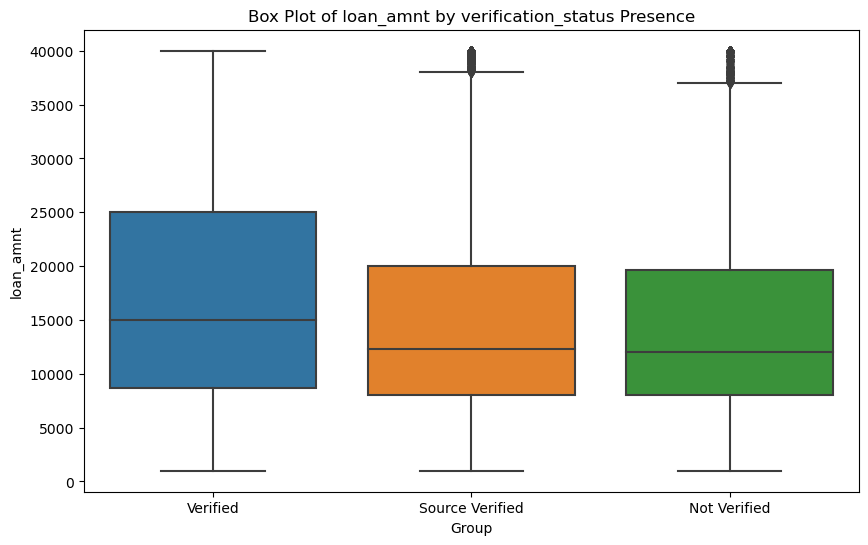

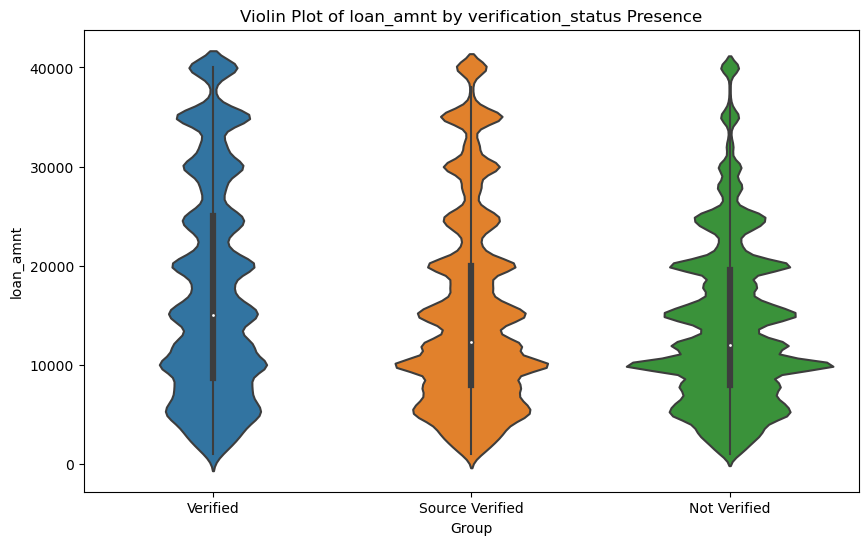

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# สมมติว่า 'catFeature' เป็นตัวแปร categorical ที่มีค่าเป็น 'A', 'B', 'C' ฯลฯ
# คุณจะต้องกำหนดกลุ่มข้อมูลโดยใช้ตัวแปร 'catFeature' ใน 'df_clean'
# ตัวอย่าง: การสร้าง plot_data สำหรับ 'catFeature' แบ่งเป็นกลุ่ม A, B, C, ...

plot_data = pd.DataFrame({
    contTarget: df_clean[contTarget],
    'Group': df_clean[catFeature]
})

# จากนั้นสร้าง Box Plot และ Violin Plot ตามโค้ดข้างบน


# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y=contTarget, data=plot_data)
plt.title(f'Box Plot of {contTarget} by {catFeature} Presence')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y=contTarget, data=plot_data)
plt.title(f'Violin Plot of {contTarget} by {catFeature} Presence')
plt.show()

In [15]:
df_clean.groupby(catFeature).size()

verification_status
Not Verified       499473
Source Verified    579046
Verified           353921
dtype: int64

In [16]:
df_clean.groupby([catFeature,'int_rate']).size()

verification_status  int_rate
Not Verified           5.31%      4940
                       5.32%     22005
                       6.00%       141
                       6.07%      2884
                       6.08%      1775
                                 ...  
Verified              30.79%       635
                      30.84%       345
                      30.89%       297
                      30.94%       185
                      30.99%       285
Length: 755, dtype: int64

In [17]:
df_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc